In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('nbaallelo.csv')

# Does a home court advantage exist?

Our hypotheses:

    H_0: Of all regular season games played, do the home and away teams have equal probability of winning the game?
        p_a = p_h = 0.5

    H_a: Of all regular season games played, do the home and away teams have an unequal probability of winning the game?
        p_a != p_h

where p_a is the probability of the away team winning the game, and p_h is the probability of the home team winning the game.

For each game played (not every row of data), we will create a column that specifies whether the away team or home team won:

In [4]:
data1.head(25)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
5,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,...,43.135952,DTF,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,...,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,...,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
8,5,194611020STB,NBA,1,1947,11/2/1946,1,0,PIT,Ironmen,...,40.507980,STB,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,...,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN


In [13]:
# keep only one row per game and regular season data only
reg_season_dist_game_data = data1[(data1['_iscopy'] == 0) & (data1['is_playoffs'] == 0)]
reg_season_dist_game_data['game_id'].nunique()

59124

In [26]:
# create a column that specifies whether the winner was the home team or the away team
reg_season_dist_game_data.head()
# a function that returns the appropriate winner, given the value in the game_result column
#if game result = L then Away
#if game result = W then Home
def home_or_away(r):
    if r == 'L':
        return 'A'
    elif r == 'W':
        return 'H'
    else:
        return
#use the above function to create a new column    
reg_season_dist_game_data.loc[:,'game_result_H_A'] = reg_season_dist_game_data.loc[:,'game_result'].apply(home_or_away)

In [30]:
# visual check to see if results look correct
reg_season_dist_game_data[['game_result','game_result_H_A']].head(50)

,game_result,game_result_H_A
0,L,A
2,W,H
4,L,A
7,W,H
9,W,H
11,W,H
12,L,A
14,L,A
17,L,A
19,W,H


In [36]:
# find the percent of times home won and away won out of all regular season games
# this gives us p_a and p_h
reg_season_dist_game_data.groupby('game_result_H_A').count()['game_id']/reg_season_dist_game_data.count()['game_id']

game_result_H_A
A    0.379913
H    0.620087
Name: game_id, dtype: float64

In [37]:
reg_season_dist_game_data.groupby('game_result_H_A').count()['game_id']

game_result_H_A
A    22462
H    36662
Name: game_id, dtype: int64

We have p_a = 0.38 and p_h = 0.62. It seems as if there could be a home court advantage, but to formally check, we will see if there is a statistically significant difference between the two values.

The p-value is the probability of observing these values and values more extreme.
What does more extreme mean? This means values of p_a and p_h where the difference is greater than what we observed (0.25).

We calculate the p-value using the binomial test:

In [42]:
from scipy.stats import binom_test
binom_test(36662, 59124, 0.5, alternative='two-sided')

2.5e-323

With the p-value being so close to 0, we can reject the null hypothesis that the home and away teams have an equal probability of winning a regular season game and conclude that there is a home court advantage.

Hmm, does the above analysis seem correct? No. The correct way to do this would be to look at each team and year as separate entities, and then compare whether each one wins more home games or scores more at home.
So for each year and team, calculate the number (or percent) of games won at home and away to see if there is a statistical significant difference.
But how do we compare, what numbers do we compare? The proportion of games won overall to games won at home? Or games won at home to games won on the road?

In [66]:
# for each year and team combination, calculate proportion of home games won and proportion of away games won, in the regular season

# total games per year, team, and location
data1[data1['is_playoffs'] == 0].groupby(['year_id', 'team_id','game_location']).count()['game_id']

year_id  team_id  game_location
1947     BOS      A                30
                  H                30
         CHS      A                30
                  H                31
         CLR      A                30
                                   ..
2015     TOR      H                41
         UTA      A                41
                  H                41
         WAS      A                41
                  H                41
Name: game_id, Length: 2998, dtype: int64

In [74]:
# total wins per year, team, and location
data1[(data1['is_playoffs'] == 0) & (data1['game_result']=='W')].groupby(['year_id', 'team_id','game_location']).count()['game_id']

year_id  team_id  game_location
1947     BOS      A                 8
                  H                14
         CHS      A                17
                  H                22
         CLR      A                13
                                   ..
2015     TOR      H                27
         UTA      A                17
                  H                21
         WAS      A                17
                  H                29
Name: game_id, Length: 2986, dtype: int64

In [102]:
data1[(data1['game_location']=='N')]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
64302,32152,199011020UTA,NBA,1,1991,11/2/1990,1,0,PHO,Suns,...,55.715054,UTA,Jazz,96,1561.0042,1546.4672,N,W,0.579737,"at Tokyo, Japan (Tokyo Metropolitan Gymnasium)"
64303,32152,199011020UTA,NBA,0,1991,11/2/1990,1,0,UTA,Jazz,...,47.435349,PHO,Suns,119,1616.8882,1631.4252,N,L,0.420263,"at Tokyo, Japan (Tokyo Metropolitan Gymnasium)"
64318,32160,199011030PHO,NBA,1,1991,11/3/1990,2,0,UTA,Jazz,...,47.984200,PHO,Suns,101,1631.4252,1626.0487,N,W,0.380116,"at Tokyo, Japan (Tokyo Metropolitan Gymnasium)"
64319,32160,199011030PHO,NBA,0,1991,11/3/1990,2,0,PHO,Suns,...,55.221325,UTA,Jazz,102,1546.4672,1551.8436,N,L,0.619884,"at Tokyo, Japan (Tokyo Metropolitan Gymnasium)"
69000,34501,199211060HOU,NBA,0,1993,11/6/1992,1,0,HOU,Rockets,...,37.309593,SEA,Thunder,111,1561.5071,1571.5670,N,L,0.369007,"at Yokohama, Japan"
69001,34501,199211060HOU,NBA,1,1993,11/6/1992,1,0,SEA,Thunder,...,49.078861,HOU,Rockets,94,1468.3109,1458.2510,N,W,0.630993,"at Yokohama, Japan"
69030,34516,199211070SEA,NBA,1,1993,11/7/1992,2,0,HOU,Rockets,...,36.896736,SEA,Thunder,89,1571.5670,1575.5388,N,L,0.342472,"at Yokohama, Japan"
69031,34516,199211070SEA,NBA,0,1993,11/7/1992,2,0,SEA,Thunder,...,49.478493,HOU,Rockets,85,1458.2510,1454.2792,N,W,0.657528,"at Yokohama, Japan"
73736,36869,199411040LAC,NBA,0,1995,11/4/1994,1,0,POR,Trailblazers,...,46.392014,LAC,Clippers,100,1382.4510,1373.8621,N,W,0.714326,"at Yokohama, Japan"
73737,36869,199411040LAC,NBA,1,1995,11/4/1994,1,0,LAC,Clippers,...,28.347383,POR,Trailblazers,121,1541.6613,1550.2502,N,L,0.285674,"at Yokohama, Japan"


In [106]:
# remove 'N' game locations
data3 = data1[(data1['is_playoffs'] == 0) & (data1['game_result']=='W')&(data1['game_location']!='N')].groupby(['year_id', 'team_id','game_location']).count()['game_id'].reset_index()
data3.rename(columns = {'game_id':'count_win'}, inplace = True)

data4 = data1[(data1['is_playoffs'] == 0) & (data1['game_location']!='N')].groupby(['year_id', 'team_id','game_location']).count()['game_id'].reset_index()
data4.rename(columns = {'game_id':'total_games'}, inplace = True)
data4.columns

# merge the two
all_data = data3.merge(data4, how='inner',on = ['year_id','team_id','game_location'],validate='1:1')

In [107]:
all_data['prop_win'] = all_data['count_win']/all_data['total_games']

In [108]:
all_data

,year_id,team_id,game_location,count_win,total_games,prop_win
0,1947,BOS,A,8,30,0.266667
1,1947,BOS,H,14,30,0.466667
2,1947,CHS,A,17,30,0.566667
3,1947,CHS,H,22,31,0.709677
4,1947,CLR,A,13,30,0.433333
...,...,...,...,...,...,...
2967,2015,TOR,H,27,41,0.658537
2968,2015,UTA,A,17,41,0.414634
2969,2015,UTA,H,21,41,0.512195
2970,2015,WAS,A,17,41,0.414634


Each proportion is calculated with about 30-40 data points. This is not enough to run any sort of significance testing accurately.
Sometimes, n = 30 is given as the cutoff for running certain tests, but given all of the other factors that are not considered here, we would need a larger number per metric to account for these factors. 
We'll just look at the distribution of proportions to get a visual for what the differences are:

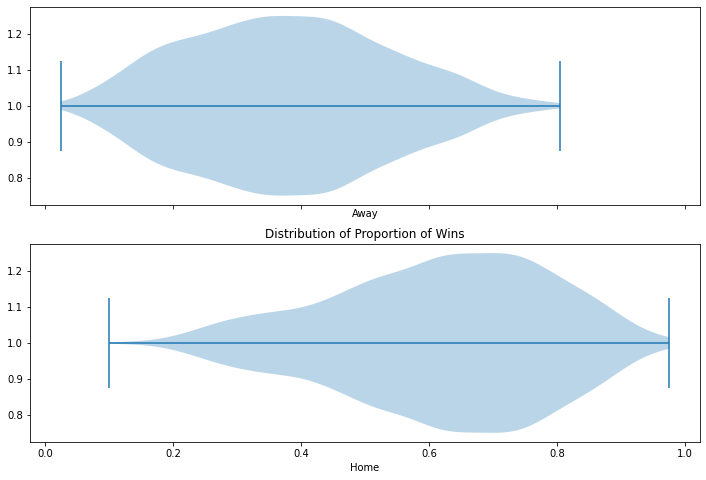

In [141]:
# plot that shows proportion of wins for home and away games for all year and team combinations
# grouped bar chart?
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 8),sharex=True, sharey=True)
plt.title('Distribution of Proportion of Wins')
ax1.violinplot(all_data[all_data['game_location']=='A']['prop_win'],vert=False)
ax2.violinplot(all_data[all_data['game_location']=='H']['prop_win'],vert=False)
ax1.set_xlabel('Away')
ax2.set_xlabel('Home')

plt.show()

In [117]:
all_data[all_data['game_location']=='A'].count()

year_id          1485
team_id          1485
game_location    1485
count_win        1485
total_games      1485
prop_win         1485
dtype: int64

In [136]:
all_data[all_data['game_location']=='H'].count()

year_id          1487
team_id          1487
game_location    1487
count_win        1487
total_games      1487
prop_win         1487
dtype: int64